## **Task** **1** :: **Prediction** **using** **supervised** **ML**
### **Problem Statement** :: Predict the scores of students based on a number of hours he/she has studied
### By :: Shamiyaz Motorwala

### Importing Libraries for analysis and visualization

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [269]:
data.shape

(25, 2)

In [270]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

## Checking the correlation between Hours and Score

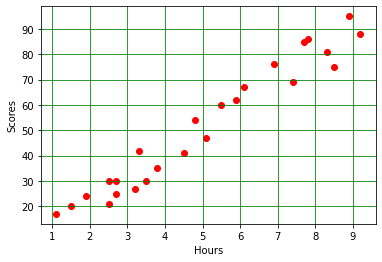

In [271]:
plt.scatter(data['Hours'], data['Scores'], color = 'red')
plt.grid(color = 'g', animated = True)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### In the above graph we can clearly see that there is a positive correlation between both the variables

## importing required Model and Metrics using scikit-learn

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Defining the independent and target variable

In [273]:
# Independent Variable X
X = data.iloc[:,0].values

# Target Variable y
y = data.iloc[:,1].values

In [274]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

### Splitting the train test data using 75-25 ratio

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Creating and training the Linear Regression Model

In [276]:
model = LinearRegression()
model = model.fit(X_train, y_train)
prediction = model.predict(X_test)

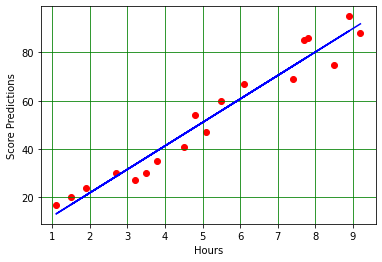

In [277]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.grid(color = 'g', animated = True)
plt.xlabel('Hours')
plt.ylabel('Score Predictions')
plt.show()

* The above graph represents the best fit regression line on training data

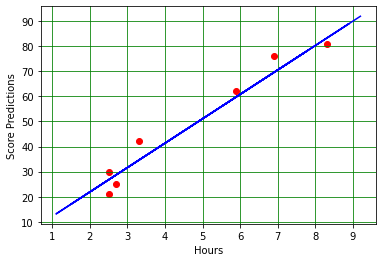

In [278]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.grid(color = 'g', animated = True)
plt.xlabel('Hours')
plt.ylabel('Score Predictions')
plt.show()

* The above graph represents the best fit regression line on test data

## Evaluating the model using different metrics

In [279]:
print('Mean Absolute Error      :: ',mean_absolute_error(y_test, prediction))
print('Root Mean Squared Error  :: ',np.sqrt(mean_squared_error(y_test, prediction)))

Mean Absolute Error      ::  4.425394675156182
Root Mean Squared Error  ::  4.849370684387328


In [280]:
result = model.predict([[9.25],])

In [281]:
print('If the student studies for 9.25 hours, he/she is expected of have a score of :: ', result)

If the student studies for 9.25 hours, he/she is expected of have a score of ::  [[92.33571987]]
